In [1]:
%reload_ext autoreload
%autoreload 2

import time as tt
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

from utils import get_track

## First, start by defining the paramters

In [2]:
# Flattened NFW halo
logM, Rs, q = 12.0, 25.0, 0.8
dirx, diry, dirz = 1.0, 1.0, 1.0

# Plummer Sattelite
logm, rs = 8.0, 2.0 

# Initial conditions
x0, y0, z0 = 100.0, 0.0, 0.0     # Position in kpc
vx0, vy0, vz0 = 0.0, 200.0, 0.0  # Velocity in km/s

# Integration time
time = 3.0 # Gyr
alpha = 1.05

params = (logM, Rs, q, dirx, diry, dirz, logm, rs, x0, y0, z0, vx0, vy0, vz0, time, alpha)

n_steps = 500 # Number of steps in the time integration
n_particles = 10000 # Number of particles in the stream

## (1) Spray Method

In [9]:
from models import generate_stream_spray

start = tt.time()
theta_stream, xv_stream = generate_stream_spray(params,  seed=111, n_steps=n_steps, n_particles=n_particles)
end = tt.time()
print(f"Time taken to generate stream using Spray: {end - start:.2f} seconds")
count, theta_bin, r_bin, w_bin = get_track(theta_stream, xv_stream[:, 0], xv_stream[:, 1])

Time taken to generate stream using Spray: 1.05 seconds


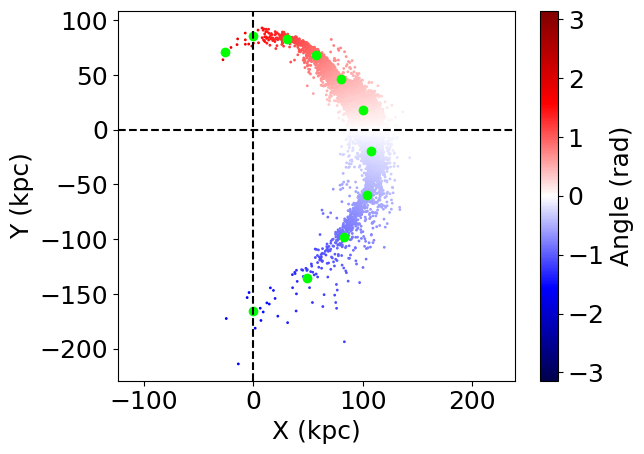

In [142]:
plt.scatter(xv_stream[:, 0], xv_stream[:, 1], c=theta_stream, s=1, cmap='seismic', vmin=-np.pi, vmax=np.pi)
plt.colorbar(label='Angle (rad)')
plt.scatter(r_bin*np.cos(theta_bin), r_bin*np.sin(theta_bin), c='lime')
plt.axvline(0, color='k', linestyle='--')
plt.axhline(0, color='k', linestyle='--')
plt.xlabel('X (kpc)')
plt.ylabel('Y (kpc)')
plt.axis('equal');

## (2) Streak Method

In [ ]:
from models import generate_stream_streak

start = tt.time()
theta_stream, xv_stream = generate_stream_streak(params,  seed=111, n_steps=n_steps, n_particles=n_particles)
end = tt.time()
print(f"Time taken to generate stream using Streak: {end - start:.2f} seconds")
count, theta_bin, r_bin, w_bin = get_track(theta_stream, xv_stream[:, 0], xv_stream[:, 1])

Time taken to generate stream using Spray: 0.17 seconds


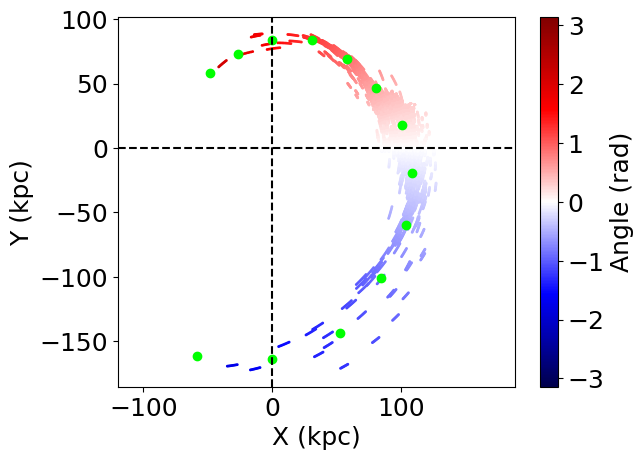

In [44]:
plt.scatter(xv_stream[:, 0], xv_stream[:, 1], c=theta_stream, s=1, cmap='seismic', vmin=-np.pi, vmax=np.pi)
plt.colorbar(label='Angle (rad)')
plt.scatter(r_bin*np.cos(theta_bin), r_bin*np.sin(theta_bin), c='lime')
plt.axvline(0, color='k', linestyle='--')
plt.axhline(0, color='k', linestyle='--')
plt.xlabel('X (kpc)')
plt.ylabel('Y (kpc)')
plt.axis('equal');

## (3) Binned method

In [28]:
%reload_ext autoreload
%autoreload 2

from models import generate_stream_bin

start = tt.time()
theta_stream, xv_stream, count_stream = generate_stream_bin(params,  seed=111, n_bins=5, n_steps=n_steps, n_particles=n_particles)

end = tt.time()
print(f"Time taken to generate stream using Streak: {end - start:.2f} seconds")
count, theta_bin, r_bin, w_bin = get_track(theta_stream, xv_stream[:, 0], xv_stream[:, 1])

Time taken to generate stream using Streak: 1.36 seconds


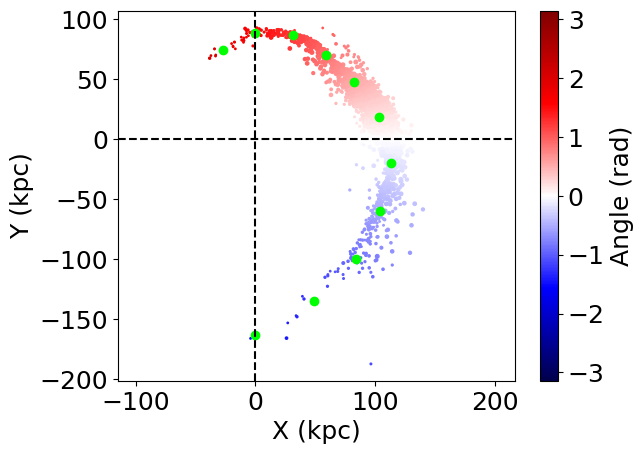

In [29]:
plt.scatter(xv_stream[:, 0], xv_stream[:, 1], c=theta_stream, s=count_stream, cmap='seismic', vmin=-np.pi, vmax=np.pi)
plt.colorbar(label='Angle (rad)')
plt.scatter(r_bin*np.cos(theta_bin), r_bin*np.sin(theta_bin), c='lime')
plt.axvline(0, color='k', linestyle='--')
plt.axhline(0, color='k', linestyle='--')
plt.xlabel('X (kpc)')
plt.ylabel('Y (kpc)')
plt.axis('equal');

## (4) 2nd Degree method